In [ ]:
Data Generation Standard (v1)
    x_data ==> X_train
Data Generation Features of Pre-trained models (v2, v3)
    X_train ==> X_train_feats_v2
            ==> X_train_feats_v3

In [1]:
import sys
## To get helper functions from another folder
# sys.path.insert(0, '../') # if _helper_basics_ is in previous folder
now_i_am_at = 'home' # home dso test
if now_i_am_at=='home': sys.path.insert(0, 'E:/Leonard HDD/Dropbox/DSO/Tasks/')
elif now_i_am_at=='dso': sys.path.insert(0, 'D:/Dropbox/DSO/Tasks')

from _helper_basics_ import *

%matplotlib inline
plt.rcParams['savefig.dpi'] = 100

%load_ext autoreload
%autoreload 2

print('keras', keras.__version__)
print('tensorflow', tf.__version__)

Using TensorFlow backend.


keras 2.0.5
tensorflow 1.2.0


In [2]:
def show_object(obj):
    # Reshape 784 array into 28x28 image
    image = obj.reshape([28,28])
    fig, axes = plt.subplots(1, )
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.imshow(image, cmap='gray_r')
    plt.show()
#shuffling function
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

num_examples_per_class = 2000
classes = ['airplane','alarm clock','ambulance','angel','ant','anvil','apple','axe', 'banana','bandage','barn','baseball bat','baseball',
           'basket', 'basketball','bathtub','beach','bear','beard','bed','bee','belt', 'bicycle','binoculars','birthday cake','blueberry', 
           'book','boomerang','bottlecap','bowtie','bracelet','brain', 'bread','broom','bulldozer','bus','bush','butterfly','cactus','cake']
num_classes = len(classes)

# Data Generation: Standard
x_data ==> X_train

In [8]:
## x_data
x_data = np.load("./x_data_40_classes_2k.npy")

## y_data
labels = [np.full((num_examples_per_class,), classes.index(qdraw)) for qdraw in classes]
y_data = np.concatenate(labels,axis=0)

## Shuffling
x_data,y_data = unison_shuffled_copies(x_data,y_data)
print('x_data',x_data.shape)
print('y_data',y_data.shape)

x_data (80000, 784)
y_data (80000,)


In [ ]:
np.save('x_data.npy',x_data)
np.save('y_data.npy',y_data)

np.save('X_train.npy',X_train)
np.save('Y_train.npy',Y_train)

In [10]:
X_train = x_data.reshape(80000,28,28,1)
Y_train = to_categorical(y_data, num_classes=num_classes)
print('X_train',X_train.shape)
print('Y_train',Y_train.shape)

X_train (80000, 28, 28, 1)
Y_train (80000, 40)


In [ ]:
## Normalised and splitting into train/test set

X_train = X_train/255.
X_train = X_train.astype(np.float16)

indices = np.arange(len(Y_train))
np.random.shuffle(indices)

X_train = X_train[:int(.8*len(Y_train))]
Y_train = Y_train[:int(.8*len(Y_train))]
X_test = X_train[int(.8*len(Y_train)):]
Y_test = Y_train[int(.8*len(Y_train)):]

np.save('X_train_normalised_spliced.npy',X_train)
np.save('Y_train_normalised_spliced.npy',Y_train)
np.save('X_test_normalised_spliced.npy',X_test)
np.save('Y_test_normalised_spliced.npy',Y_test)

### Visualisation

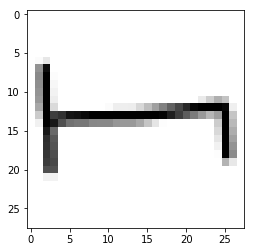

classes[y_data[idx]] bed
y_data[idx] 19
np.argmax(Y_train[idx]) 19


In [11]:
idx = 5000

## visual of x,y_data
show_object(x_data[idx])
print('classes[y_data[idx]]', classes[y_data[idx]])
print('y_data[idx]',y_data[idx])

## To verify correctnessof X,Y_train
print('np.argmax(Y_train[idx])',np.argmax(Y_train[idx]))

# Data Generation: Features from Pre-trained Models
    X_train ==> X_train_feats_v2
    X_train ==> X_train_feats_v3

### Simple Concatenate to form pseudo 3 channel image

In [15]:
## Generate 3 channels
X_train_3 = np.append(np.append(X_train,X_train,axis=3), X_train, axis=3)
print('X_train_3',X_train_3.shape)

X_train_3 (80000, 28, 28, 3)


#### V2: Xception

In [16]:
Archi_dir = 'v2/'

## Loading the Pre-trained Xception Model
Inp = Input(shape=(28,28,3))
Xception_model = Xception(include_top=False, input_tensor=Inp)
for layer in Xception_model.layers:    layer.trainable = False
Outp = Xception_model(Inp)
Get_Feats_v2 = Model(Inp,Outp)
Get_Feats_v2.summary()

## Generating output of Xception as features
start_time = time.time()
X_train_feat_v2 = Get_Feats_v2.predict(X_train_3)
print('X_train_feat_v2',X_train_feat_v2.shape)
print('Y_train',Y_train.shape)
print('time taken to generate feats : {}'.format(time.time()-start_time))

start_time = time.time()
np.save(Archi_dir+'X_train_feat_v2.npy',X_train_feat_v2)
print('time taken to save feats : {}'.format(time.time()-start_time))

X_train_feat_v2 (80000, 1, 1, 2048)
Y_train (80000, 40)
time taken to generate feats : 472.32990431785583
time taken to save feats : 0.0


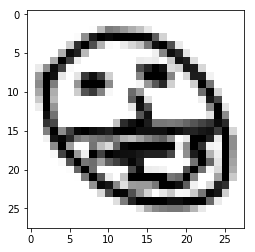

classes[y_data[idx]] beard
y_data[idx] 18
np.argmax(Y_train[idx]) 18


In [17]:
## Sanity check

idx = 0; channel = 0
show_object(X_train_3[idx,:,:,channel])
print('classes[y_data[idx]]', classes[y_data[idx]])
print('y_data[idx]',y_data[idx])
print('np.argmax(Y_train[idx])',np.argmax(Y_train[idx]))

In [4]:
## Load
X_train_feat_v2 = np.load(Archi_dir+'X_train_feat_v2.npy')
Y_train = np.load('Y_train.npy')

print('X_train_feat_v2',X_train_feat_v2.shape)
print('Y_train',Y_train.shape)

X_train_feat_v2 (80000, 1, 1, 2048)
Y_train (80000, 40)


#### V3:MobileNet

In [ ]:
Archi_dir = 'v3/'

Inp = Input(shape=(28,28,3))
Mobilenet_model = Mobilenet(include_top=False, input_tensor=Inp)
for layer in Mobilenet_model.layers:    layer.trainable = False
Outp = Mobilenet_model(Inp)
Get_Feats_v3 = Model(Inp,Outp)
Get_Feats_v3.summary()

start_time = time.time()
X_train_feat_v3 = Get_Feats_v3.predict(X_train_3)
print('X_train_feat_v3',X_train_feat_v3.shape)
print('Y_train',Y_train.shape)
print('time taken to generate feats : {}'.format(time.time()-start_time))

start_time = time.time()
# np.save(Archi_dir+'X_train_feat_v3.npy',X_train_feat_v3)
print('time taken to save feats : {}'.format(time.time()-start_time))